In [112]:
#Required imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.utils import class_weight
import keras
from keras.layers import Input,Dense,LeakyReLU,Dropout
from keras.activations import sigmoid,softmax
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt
def gpa_to_grades(pred):
    grades = np.zeros(shape=pred.shape).tolist()
    for i in range(len(pred)):
        for j in range(len(pred[i])):
            if(pred[i][j]>=9.5):
                grades[i][j] ='O'
            elif(pred[i][j]>=8.75 and pred[i][j]<9.5):
                grades[i][j]='A+'
            elif(pred[i][j]>=8.25 and pred[i][j]<8.75):
                grades[i][j] = 'A'
            elif(pred[i][j]>=7.5 and pred[i][j]<8.25):
                grades[i][j] = 'B+'
            elif(pred[i][j]>=6.5 and pred[i][j]<7.5):
                grades[i][j] = 'B'
            elif(pred[i][j]>=5.5 and pred[i][j]<6.5):
                grades[i][j] = 'C'
            elif(pred[i][j]>=5.0 and pred[i][j]<5.5):
                grades[i][j] = 'P'
            elif(pred[i][j]<5.0):
                grades[i][j] = 'F'
    return grades

In [113]:
s2 = pd.read_excel('data/S2_2015_GP.xlsx')
s3 = pd.read_excel('data/S3_2015_GP.xlsx')
s2 = s2.values
s3 = s3.values
s2= np.delete(s2,0,1)
s3 = np.delete(s3,0,1)
s2 = s2/10.0
s3 = s3/10.0

In [114]:
s3

array([[0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.8],
       [0.4, 0.5, 0.4, 0.7, 0.6, 0.6, 0.85, 0.7],
       [0.8, 0.6, 0.6, 0.85, 0.7, 0.8, 0.7, 0.85],
       [0.4, 0.4, 0.4, 0.7, 0.6, 0.4, 0.8, 0.7],
       [0.4, 0.4, 0.4, 0.6, 0.5, 0.5, 0.8, 0.6],
       [0.6, 0.4, 0.6, 0.6, 0.6, 0.7, 0.85, 0.8],
       [0.6, 0.7, 0.6, 0.6, 0.7, 0.6, 0.7, 0.7],
       [0.6, 0.5, 0.7, 0.6, 0.5, 0.6, 0.7, 0.6],
       [0.6, 0.6, 0.7, 0.8, 0.7, 0.8, 0.6, 0.8],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.7, 0.7],
       [0.7, 0.4, 0.4, 0.6, 0.6, 0.7, 0.8, 0.7],
       [0.7, 0.8, 0.7, 0.8, 0.7, 0.8, 0.8, 0.8],
       [0.6, 0.4, 0.4, 0.6, 0.4, 0.6, 0.8, 0.6],
       [0.8, 0.6, 0.6, 0.8, 0.6, 0.8, 0.8, 0.8],
       [0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7],
       [0.85, 0.8, 0.7, 0.7, 0.8, 0.8, 0.85, 0.8],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 0.7, 0.7],
       [0.6, 0.4, 0.4, 0.6, 0.6, 0.6, 0.85, 0.8],
       [0.4, 0.4, 0.4, 0.6, 0.4, 0.4, 0.6, 0.7],
       [0.7, 0.8, 0.7, 0.6, 0.7, 0.6, 0.85, 0.8],
       [0.4,

In [160]:
input_layer = Input((s2.shape[1],))
y = Dense(16,activation='tanh')(input_layer)
y = Dropout(0.8)(y)
y = Dense(32,activation='tanh')(y)
y = Dropout(0.8)(y)
y = Dense(8,activation='tanh')(y)
model = Model(inputs=input_layer,outputs=y)

In [161]:
model.compile(Adam(lr=0.001),loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 9)                 0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                160       
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_26 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 264       
Total params: 968
Trainable params: 968
Non-trainable params: 0
_________________________________________________________________


Train on 5 samples, validate on 52 samples
Epoch 1/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0324 - val_loss: 0.0179
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.0178
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.0177
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.0176
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0175
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.0174
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.0173
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.0172
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0259 - val_loss: 0.0172
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 0

Epoch 84/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.0178
Epoch 85/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0178
Epoch 86/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0397 - val_loss: 0.0178
Epoch 87/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0178
Epoch 88/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 89/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.0178
Epoch 90/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.0179
Epoch 91/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0179
Epoch 92/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0435 - val_loss: 0.0179
Epoch 93/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.0179
Epoch 94/1

Epoch 167/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0176
Epoch 168/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0177
Epoch 169/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0187 - val_loss: 0.0177
Epoch 170/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0178
Epoch 171/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0179
Epoch 172/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0356 - val_loss: 0.0180
Epoch 173/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0296 - val_loss: 0.0181
Epoch 174/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0195 - val_loss: 0.0182
Epoch 175/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0184
Epoch 176/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0185


Epoch 249/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0181
Epoch 250/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0181
Epoch 251/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0181
Epoch 252/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0182
Epoch 253/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0182
Epoch 254/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0139 - val_loss: 0.0183
Epoch 255/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0183
Epoch 256/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0183
Epoch 257/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0184
Epoch 258/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0184


Epoch 331/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0186
Epoch 332/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0184
Epoch 333/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0184
Epoch 334/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0183
Epoch 335/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0310 - val_loss: 0.0182
Epoch 336/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0181
Epoch 337/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0180
Epoch 338/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0180
Epoch 339/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0179
Epoch 340/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0254 - val_loss: 0.0180


Epoch 413/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0178
Epoch 414/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0159 - val_loss: 0.0180
Epoch 415/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0181
Epoch 416/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0182
Epoch 417/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0183
Epoch 418/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0211 - val_loss: 0.0183
Epoch 419/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0184
Epoch 420/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0185
Epoch 421/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0186
Epoch 422/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - val_loss: 0.0187


Epoch 495/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0184
Epoch 496/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0183
Epoch 497/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0182
Epoch 498/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0181
Epoch 499/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0180
Epoch 500/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0180
Epoch 501/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0179
Epoch 502/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0179
Epoch 503/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0178
Epoch 504/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0178


Epoch 577/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0181
Epoch 578/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0181
Epoch 579/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0181
Epoch 580/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0182
Epoch 581/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0182
Epoch 582/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0182
Epoch 583/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0183
Epoch 584/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0183
Epoch 585/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0183
Epoch 586/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0183


Epoch 659/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.0180
Epoch 660/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0180
Epoch 661/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0181
Epoch 662/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0181
Epoch 663/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 664/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0181
Epoch 665/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0181
Epoch 666/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0181
Epoch 667/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0182
Epoch 668/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0182


Epoch 741/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 742/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0175
Epoch 743/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0175
Epoch 744/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 0.0175
Epoch 745/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0176
Epoch 746/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0176
Epoch 747/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0176
Epoch 748/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0176
Epoch 749/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0176
Epoch 750/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0209 - val_loss: 0.0176


Epoch 823/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0172
Epoch 824/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0171
Epoch 825/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0171
Epoch 826/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0170
Epoch 827/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0169
Epoch 828/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0168
Epoch 829/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0168
Epoch 830/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0168
Epoch 831/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0168
Epoch 832/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0168


Epoch 905/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0173
Epoch 906/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0173
Epoch 907/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0173
Epoch 908/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0173
Epoch 909/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0173
Epoch 910/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0173
Epoch 911/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0131 - val_loss: 0.0173
Epoch 912/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 913/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0173
Epoch 914/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0173


Epoch 987/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0183
Epoch 988/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0183
Epoch 989/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0183
Epoch 990/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0182
Epoch 991/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0182
Epoch 992/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0182
Epoch 993/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0182
Epoch 994/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0182
Epoch 995/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0182
Epoch 996/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0182


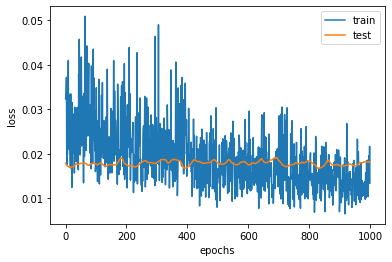

In [167]:
history = model.fit(s2,s3,validation_split=0.9,epochs=1000,callbacks=[ModelCheckpoint('best_model.hdf5',monitor='val_loss',mode='min')],shuffle=True)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [168]:
x_test = s2[51:]
y_test = s3[51:]
model.load_weights('best_model.hdf5')
pred = model.predict(x_test)
rmse = np.mean(np.square((y_test-pred)*10))
print('Totatl RMSE :',rmse)

Totatl RMSE : 1.2885527835308819


7.610525548911272 - dense (32,64,8) dropout(0.8) tanh epochs-1000
2.7823069733661554 - dense (16,64,8) dropout(0.8) tanh epochs-1000
2.6685555429057035 - dense (16,32,8) dropout(0.8) tanh epochs-1000
1.2885527835308819 - dense (16,32,8) dropout(0.8) tanh epochs-2000
1.5446398087044575 - dense (8,32,8) dropout(0.8) tanh epochs-2000

In [169]:
np.round(pred*10),np.round((y_test*10).astype('float32'))

(array([[5., 4., 4., 7., 6., 5., 7., 7.],
        [6., 5., 4., 7., 6., 6., 8., 7.],
        [5., 5., 5., 7., 6., 6., 8., 8.],
        [6., 5., 5., 7., 6., 6., 8., 8.],
        [6., 5., 4., 7., 6., 6., 7., 7.],
        [6., 5., 4., 7., 6., 6., 7., 7.]], dtype=float32),
 array([[4., 4., 4., 6., 4., 6., 7., 8.],
        [6., 4., 4., 5., 5., 4., 7., 7.],
        [7., 6., 6., 6., 6., 8., 8., 9.],
        [7., 4., 6., 5., 5., 6., 8., 8.],
        [6., 6., 4., 6., 5., 7., 8., 7.],
        [4., 4., 6., 4., 7., 6., 7., 8.]], dtype=float32))

In [170]:
y_pred_inv = gpa_to_grades(pred*10)
y_test_inv = gpa_to_grades(y_test*10)

In [171]:
y_pred_inv,y_test_inv

([['P', 'F', 'F', 'B', 'C', 'P', 'B', 'B'],
  ['C', 'F', 'F', 'B', 'C', 'C', 'B+', 'B'],
  ['P', 'P', 'F', 'B', 'C', 'C', 'B+', 'B+'],
  ['C', 'F', 'F', 'B', 'C', 'C', 'B+', 'B+'],
  ['C', 'F', 'F', 'B', 'C', 'C', 'B', 'B'],
  ['C', 'F', 'F', 'B', 'C', 'C', 'B', 'B']],
 [['F', 'F', 'F', 'C', 'F', 'C', 'B', 'B+'],
  ['C', 'F', 'F', 'P', 'P', 'F', 'B', 'B'],
  ['B', 'C', 'C', 'C', 'C', 'B+', 'A', 'A+'],
  ['B', 'F', 'C', 'P', 'P', 'C', 'B+', 'B+'],
  ['C', 'C', 'F', 'C', 'P', 'B', 'B+', 'B'],
  ['F', 'F', 'C', 'F', 'B', 'C', 'B', 'B+']])